In [1]:
def dot_product(v1, v2):
    return sum(a * b for a, b in zip(v1, v2))

# Example
v1 = [1, 2, 3]
v2 = [4, 5, 6]
print("Dot Product:", dot_product(v1, v2))


Dot Product: 32


In [2]:
import numpy as np

A = np.array([[1, 2, 3], [0, 1, 4], [5, 6, 0]])
transpose = A.T
determinant = np.linalg.det(A)
inverse = np.linalg.inv(A)

print("Transpose:\n", transpose)
print("Determinant:", determinant)
print("Inverse:\n", inverse)


Transpose:
 [[1 0 5]
 [2 1 6]
 [3 4 0]]
Determinant: 0.9999999999999964
Inverse:
 [[-24.  18.   5.]
 [ 20. -15.  -4.]
 [ -5.   4.   1.]]


In [3]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(df.describe())
print("Mean:\n", df.mean())
print("Std:\n", df.std())
print("Min:\n", df.min())
print("Max:\n", df.max())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
Mean:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
Std:
 sepal length (cm)    0.828066
se

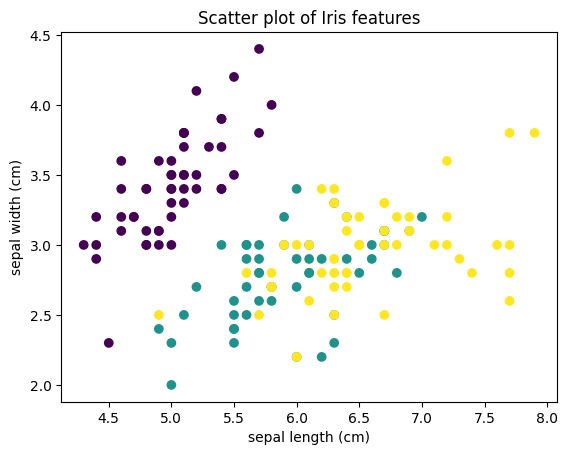

In [4]:
import matplotlib.pyplot as plt

x = df[iris.feature_names[0]]
y = df[iris.feature_names[1]]
target = iris.target

plt.scatter(x, y, c=target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Scatter plot of Iris features")
plt.show()


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

y_true = [0, 1, 0, 1, 0, 1, 0, 1]
y_pred = [0, 1, 0, 0, 0, 1, 1, 1]

cm = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)


Confusion Matrix:
 [[3 1]
 [1 3]]
Accuracy: 0.75
Precision: 0.75
Recall: 0.75


In [6]:
import pandas as pd

data = {
    "Study_Hours": [2, 4, 3, 5, 6, 1, 7, 8, 2.5, 3.5],
    "Attendance": [70, 80, 75, 90, 85, 60, 95, 100, 65, 78],
    "Sleep_Hours": [6, 7, 6.5, 8, 7.5, 5, 8.5, 9, 6.2, 7.1],
    "Score": [55, 65, 60, 78, 75, 50, 85, 90, 58, 62]
}
df = pd.DataFrame(data)


   Study_Hours  Attendance  Sleep_Hours  Score
0          2.0          70          6.0     55
1          4.0          80          7.0     65
2          3.0          75          6.5     60
3          5.0          90          8.0     78
4          6.0          85          7.5     75
       Study_Hours  Attendance  Sleep_Hours      Score
count    10.000000   10.000000    10.000000  10.000000
mean      4.200000   79.800000     7.080000  67.800000
std       2.263233   12.925427     1.217283  13.431307
min       1.000000   60.000000     5.000000  50.000000
25%       2.625000   71.250000     6.275000  58.500000
50%       3.750000   79.000000     7.050000  63.500000
75%       5.750000   88.750000     7.875000  77.250000
max       8.000000  100.000000     9.000000  90.000000


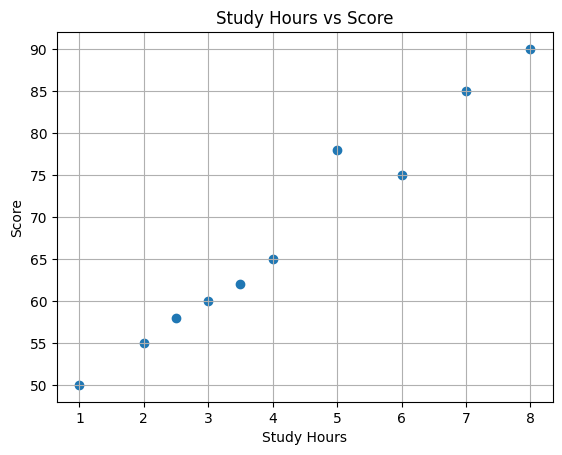

In [7]:
print(df.head())
print(df.describe())

# Plot
plt.scatter(df["Study_Hours"], df["Score"])
plt.xlabel("Study Hours")
plt.ylabel("Score")
plt.title("Study Hours vs Score")
plt.grid(True)
plt.show()


In [8]:
X = df[["Study_Hours", "Attendance", "Sleep_Hours"]].values
mean_vector = np.mean(X, axis=0)
cov_matrix = np.cov(X.T)
eigenvalues, _ = np.linalg.eig(cov_matrix)

print("Mean Vector:", mean_vector)
print("Covariance Matrix:\n", cov_matrix)
print("Eigenvalues:", eigenvalues)


Mean Vector: [ 4.2  79.8   7.08]
Covariance Matrix:
 [[  5.12222222  28.21111111   2.66555556]
 [ 28.21111111 167.06666667  15.49555556]
 [  2.66555556  15.49555556   1.48177778]]
Eigenvalues: [1.73279386e+02 3.54347776e-01 3.69333663e-02]


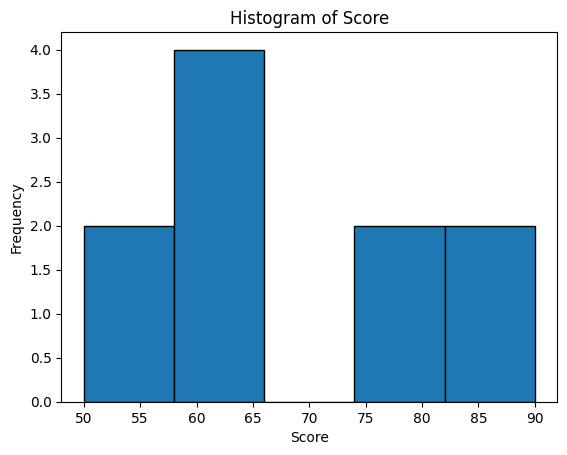

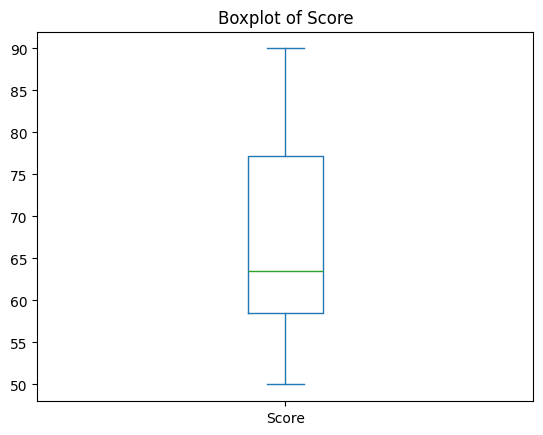

Mean: 67.8, Median: 63.5, Mode: 50, Std Dev: 13.431306712304652
Skewness: 0.3912528493932262, Kurtosis: -1.159106432158186


In [11]:
from scipy.stats import skew, kurtosis, mode
import matplotlib.pyplot as plt

# Histogram
plt.hist(df["Score"], bins=5, edgecolor='black')
plt.title("Histogram of Score")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Boxplot
df["Score"].plot.box()
plt.title("Boxplot of Score")
plt.show()

# Statistics
mean = df["Score"].mean()
median = df["Score"].median()
mode_val = mode(df["Score"], keepdims=False).mode.item()
std_dev = df["Score"].std()
skewness = skew(df["Score"])
kurt = kurtosis(df["Score"])

print(f"Mean: {mean}, Median: {median}, Mode: {mode_val}, Std Dev: {std_dev}")
print(f"Skewness: {skewness}, Kurtosis: {kurt}")



MSE: 63.46990132586716
R2 Score: -4.181216434764666


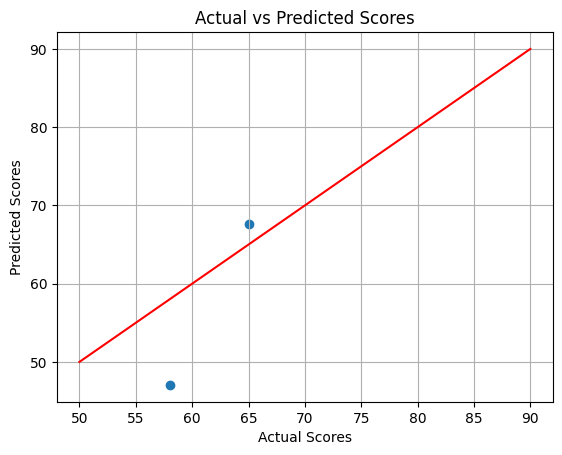

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[["Study_Hours", "Attendance", "Sleep_Hours"]]
y = df["Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.grid(True)
plt.show()
